In [12]:
from sklearn.externals import joblib
import matplotlib.pylab as plt

In [6]:
with open('data/amazon.pkl', 'rb') as f:
    data = joblib.load(f)
locals().update(data) ;
tdm.shape

(1000, 1000)

In [7]:
from sklearn.decomposition import TruncatedSVD

In [8]:
svd = TruncatedSVD(n_components=30)  # 열(차원)을 30개로 축소한다는 의미

In [14]:
pos = svd.fit_transform(tdm)
pos.shape
# 상관관계가 높은 녀석들끼리 묶어주는 방식

(1000, 30)

In [20]:
pos

array([[ 0.01202681,  0.00425013,  0.00350145, ...,  0.03052883,
         0.09520161,  0.12365271],
       [ 0.11208652,  0.35319464,  0.21310833, ..., -0.0539762 ,
        -0.02390963,  0.0322878 ],
       [ 0.33450394, -0.00642341, -0.24384499, ..., -0.02528078,
        -0.02086828,  0.00254001],
       ...,
       [ 0.0362548 ,  0.02089217,  0.0148481 , ...,  0.09367313,
         0.04171058, -0.15505606],
       [ 0.00780174,  0.00177004,  0.01056829, ..., -0.0298325 ,
        -0.01592387,  0.03206722],
       [ 0.02126311,  0.0026091 ,  0.01228276, ...,  0.01719783,
         0.05820133,  0.02538192]])

In [22]:
pos[sentiment==0]

array([[ 0.01202681,  0.00425013,  0.00350145, ...,  0.03052883,
         0.09520161,  0.12365271],
       [ 0.02093017, -0.00072832,  0.00439005, ..., -0.00187001,
         0.10187782,  0.14111132],
       [ 0.01828932,  0.01120376,  0.0147353 , ...,  0.08909723,
         0.10207503,  0.07282617],
       ...,
       [ 0.0362548 ,  0.02089217,  0.0148481 , ...,  0.09367313,
         0.04171058, -0.15505606],
       [ 0.00780174,  0.00177004,  0.01056829, ..., -0.0298325 ,
        -0.01592387,  0.03206722],
       [ 0.02126311,  0.0026091 ,  0.01228276, ...,  0.01719783,
         0.05820133,  0.02538192]])

In [23]:
type(pos)

numpy.ndarray

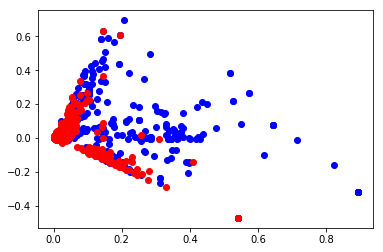

In [13]:
dim1 = 0
dim2 = 1
plt.plot(pos[sentiment==1, dim1], pos[sentiment==1, dim2], 'bo')
plt.plot(pos[sentiment==0, dim1], pos[sentiment==0, dim2], 'ro')

In [24]:
from sklearn.preprocessing import Normalizer

In [25]:
norm = Normalizer(copy=False)

In [26]:
pos2 = norm.fit_transform(pos)

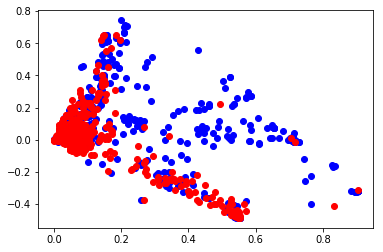

In [27]:
dim1 = 0
dim2 = 1
plt.plot(pos2[sentiment==1, dim1], pos2[sentiment==1, dim2], 'bo')
plt.plot(pos2[sentiment==0, dim1], pos2[sentiment==0, dim2], 'ro')

In [30]:
from sklearn.pipeline import make_pipeline

In [31]:
lsa = make_pipeline(svd, norm)

In [33]:
lsa.transform(tdm)

array([[ 0.0649157 ,  0.02308599,  0.01892719, ...,  0.15103172,
         0.48974287,  0.67330095],
       [ 0.14505588,  0.45711358,  0.27584999, ..., -0.06784993,
        -0.02929245,  0.04196315],
       [ 0.71661685, -0.01376001, -0.52237005, ..., -0.05548762,
        -0.0465426 ,  0.00174704],
       ...,
       [ 0.06521529,  0.03761811,  0.02664364, ...,  0.16597553,
         0.07526611, -0.2851014 ],
       [ 0.06556518,  0.01464638,  0.08744742, ..., -0.22413293,
        -0.2180473 ,  0.27512599],
       [ 0.06864243,  0.00833879,  0.03952692, ...,  0.04029766,
         0.20419242,  0.09450603]])